## Sprint 9. Anàlisi de sentiment i textos

### Exercici 1
#### Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

El texto con elvamos a realizar este ejercicio lo hemos copia de este enlace:  
https://www.theatlantic.com/technology/archive/2015/07/toki-pona-smallest-language/398363/

Para realizar nuestro ejercicio utilizaremos el Natural Language Toolkit (NLTK). El NLTK es un conjunto de librerías y programas para Python con los que llevaremos a cabo las tareas relacionadas con el Procesamiento del Lenguaje Natural, desde tokenización, hasta derivación, etiquetado de parte del habla, etc... Muchas de estas tareas ya están programadas de manera eficiente en el NLTK y las podremos usar directamente en nuestro algoritmo.  
Para calcular la frecuencia de las palabras de nuestro texto necesitamos dividirlo en palabras, a este proceso se le conoce como tokenización, y las palabras que obtendremos se conocen como tokens.

In [2]:
from nltk.tokenize import word_tokenize
# nuestro texto
text = 'That metaphorical process is at the heart of Toki Pona, the world’s smallest language. While the Oxford English Dictionary contains a quarter of a million entries, and even Koko the gorilla communicates with over 1,000 gestures in American Sign Language, the total vocabulary of Toki Pona is a mere 123 words. Yet, as the creator Sonja Lang and many other Toki Pona speakers insist, it is enough to express almost any idea. This economy of form is accomplished by reducing symbolic thought to its most basic elements, merging related concepts, and having single words perform multiple functions of speech.'
# tokenizamos el texto
tokenized_text=word_tokenize(text)
print(tokenized_text)

['That', 'metaphorical', 'process', 'is', 'at', 'the', 'heart', 'of', 'Toki', 'Pona', ',', 'the', 'world', '’', 's', 'smallest', 'language', '.', 'While', 'the', 'Oxford', 'English', 'Dictionary', 'contains', 'a', 'quarter', 'of', 'a', 'million', 'entries', ',', 'and', 'even', 'Koko', 'the', 'gorilla', 'communicates', 'with', 'over', '1,000', 'gestures', 'in', 'American', 'Sign', 'Language', ',', 'the', 'total', 'vocabulary', 'of', 'Toki', 'Pona', 'is', 'a', 'mere', '123', 'words', '.', 'Yet', ',', 'as', 'the', 'creator', 'Sonja', 'Lang', 'and', 'many', 'other', 'Toki', 'Pona', 'speakers', 'insist', ',', 'it', 'is', 'enough', 'to', 'express', 'almost', 'any', 'idea', '.', 'This', 'economy', 'of', 'form', 'is', 'accomplished', 'by', 'reducing', 'symbolic', 'thought', 'to', 'its', 'most', 'basic', 'elements', ',', 'merging', 'related', 'concepts', ',', 'and', 'having', 'single', 'words', 'perform', 'multiple', 'functions', 'of', 'speech', '.']


In [3]:
# calculamos la frecuencia de cada palabra en el texto
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_text)
print(fdist)

<FreqDist with 81 samples and 112 outcomes>


In [4]:
# vemos cuáles son las palabras más frecuentes
fdist.most_common(6)

[(',', 7), ('the', 6), ('of', 5), ('is', 4), ('.', 4), ('Toki', 3)]

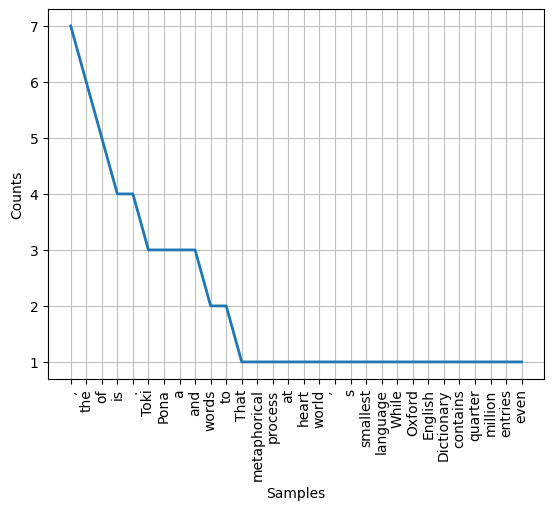

In [5]:
# reflejamos en una gráfica la frecuencia
fdist.plot(30,cumulative=False)
plt.show()

### Exercici 2
#### Treu les stopwords i realitza stemming al teu conjunt de dades.



Después de tokenizar el texto estamos trabajando a nivel de palabra. Para poder trabajar con nuestra lista de palabras debemos normalizarla.  Normalizar un grupo de palabras es aplicarles un conjunto de tareas que permitan que el procesamiento proceda de manera uniforme.  
Las tareas de normalización que nuestro texto necesita serán las siguientes:

#### Eliminación de signos de puntuación.

In [6]:
import re

print('Número de tokens en nuestro texto antes de limpiar signos de puntuación: ',len(tokenized_text))

tokenized_text = [re.sub("[^-9A-Za-z ]", "" , w) for w in tokenized_text]

while '' in tokenized_text:
    tokenized_text.remove('')

print('Número de tokens en nuestro texto después de limpiar signos de puntuación: ',len(tokenized_text))

Número de tokens en nuestro texto antes de limpiar signos de puntuación:  112
Número de tokens en nuestro texto después de limpiar signos de puntuación:  98


#### Eliminación de Stopwords.  
Se conocen como Stopwords las palabras vacías que no agregan significado a los datos, se consideran 'ruido'. Estas palabras deben eliminarse, ayuda a reducir las características de nuestros datos.  
Para eliminar estas Stopwords con el kit NLTK necesitamos una lista que las contenga y filtrar nuestra lista de tokens con esa lista de Stopwords de referencia.

In [7]:
from nltk.corpus import stopwords
# obtenemos la lista de Stopwords de un módulo de la librería nltk, hacemos un set con ellas
stop_words=set(stopwords.words("english"))
print(stop_words)

{'they', 'this', 'further', 'down', 'some', 'd', "wouldn't", 'above', 'he', 'about', 'couldn', 'herself', 'nor', 'than', 'who', 'not', 'weren', 'here', 'because', 'are', "won't", 'to', 'o', 'at', 'mustn', 'do', 'what', 'did', 'then', 'over', "mightn't", 'only', 'will', 'his', 'its', 'shouldn', 'while', "shan't", 'been', 'into', 'how', 'again', 'had', 'shan', 'yourself', 'such', 'we', 'ours', 'can', 'i', 'and', 'once', 'up', 't', 'more', 'ourselves', 'why', 'needn', 'so', 'those', 'm', 'where', 'itself', 'your', 'being', 'her', 'll', 'but', "needn't", 'yours', "mustn't", 'with', 'won', "haven't", 'very', 'just', 'doing', 've', "you've", 'it', 'now', 'is', 'be', 'have', "that'll", 'few', 'same', 'hasn', "you're", 'both', 'didn', "you'd", 'which', 'should', 'himself', 'of', 'y', 'myself', 'ain', 'were', 'too', 'any', "don't", "shouldn't", "doesn't", 'our', 'out', 'after', "it's", 'these', "hasn't", 'she', 'them', 'against', 'me', 'am', 'as', 'whom', 'haven', 'an', "should've", 'below', 'o

In [8]:
# filtramos nuestros tokens
filtered_text=[]
for word in tokenized_text:
    if word not in stop_words:
        filtered_text.append(word)
print("Tokenized Sentence:",tokenized_text)
print('')
print("Filterd Sentence:",filtered_text)

Tokenized Sentence: ['That', 'metaphorical', 'process', 'is', 'at', 'the', 'heart', 'of', 'Toki', 'Pona', 'the', 'world', 's', 'smallest', 'language', 'While', 'the', 'Oxford', 'English', 'Dictionary', 'contains', 'a', 'quarter', 'of', 'a', 'million', 'entries', 'and', 'even', 'Koko', 'the', 'gorilla', 'communicates', 'with', 'over', 'gestures', 'in', 'American', 'Sign', 'Language', 'the', 'total', 'vocabulary', 'of', 'Toki', 'Pona', 'is', 'a', 'mere', 'words', 'Yet', 'as', 'the', 'creator', 'Sonja', 'Lang', 'and', 'many', 'other', 'Toki', 'Pona', 'speakers', 'insist', 'it', 'is', 'enough', 'to', 'express', 'almost', 'any', 'idea', 'This', 'economy', 'of', 'form', 'is', 'accomplished', 'by', 'reducing', 'symbolic', 'thought', 'to', 'its', 'most', 'basic', 'elements', 'merging', 'related', 'concepts', 'and', 'having', 'single', 'words', 'perform', 'multiple', 'functions', 'of', 'speech']

Filterd Sentence: ['That', 'metaphorical', 'process', 'heart', 'Toki', 'Pona', 'world', 'smallest',

#### Stemming.  
El stemming es un proceso de normalización lingüística que reduce las palabras a su raíz elinando los sufijos. La palabra derivada puede no ser parte del diccionario, es decir, no necesariamente dará significado. Hay dos tipos principales de Stemmer: Porter Stemmer y Snow Ball Stemmer (versión avanzada de Porter Stemmer).

In [9]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_text:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_text)
print('')
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['That', 'metaphorical', 'process', 'heart', 'Toki', 'Pona', 'world', 'smallest', 'language', 'While', 'Oxford', 'English', 'Dictionary', 'contains', 'quarter', 'million', 'entries', 'even', 'Koko', 'gorilla', 'communicates', 'gestures', 'American', 'Sign', 'Language', 'total', 'vocabulary', 'Toki', 'Pona', 'mere', 'words', 'Yet', 'creator', 'Sonja', 'Lang', 'many', 'Toki', 'Pona', 'speakers', 'insist', 'enough', 'express', 'almost', 'idea', 'This', 'economy', 'form', 'accomplished', 'reducing', 'symbolic', 'thought', 'basic', 'elements', 'merging', 'related', 'concepts', 'single', 'words', 'perform', 'multiple', 'functions', 'speech']

Stemmed Sentence: ['that', 'metaphor', 'process', 'heart', 'toki', 'pona', 'world', 'smallest', 'languag', 'while', 'oxford', 'english', 'dictionari', 'contain', 'quarter', 'million', 'entri', 'even', 'koko', 'gorilla', 'commun', 'gestur', 'american', 'sign', 'languag', 'total', 'vocabulari', 'toki', 'pona', 'mere', 'word', 'yet', 'cr

#### Volvemos a calcular la frecuencia para ver cómo se han reducido nuestras palabra y cómo todas aportan contenido al conjunto de nuestros datos.

In [10]:
fdist = FreqDist(stemmed_words)
print(fdist)

<FreqDist with 56 samples and 62 outcomes>


In [11]:
fdist.most_common(6)

[('toki', 3),
 ('pona', 3),
 ('languag', 2),
 ('word', 2),
 ('that', 1),
 ('metaphor', 1)]

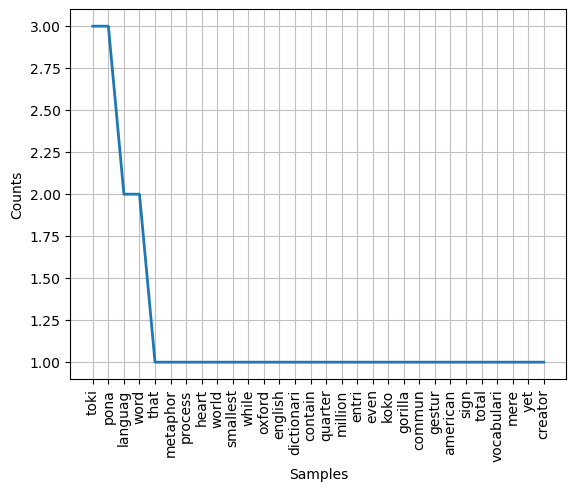

In [12]:
fdist.plot(30,cumulative=False)
plt.show()

#### Ya tenemos nuestro texto tokenizado y limpio.

In [13]:
stemmed_words

['that',
 'metaphor',
 'process',
 'heart',
 'toki',
 'pona',
 'world',
 'smallest',
 'languag',
 'while',
 'oxford',
 'english',
 'dictionari',
 'contain',
 'quarter',
 'million',
 'entri',
 'even',
 'koko',
 'gorilla',
 'commun',
 'gestur',
 'american',
 'sign',
 'languag',
 'total',
 'vocabulari',
 'toki',
 'pona',
 'mere',
 'word',
 'yet',
 'creator',
 'sonja',
 'lang',
 'mani',
 'toki',
 'pona',
 'speaker',
 'insist',
 'enough',
 'express',
 'almost',
 'idea',
 'thi',
 'economi',
 'form',
 'accomplish',
 'reduc',
 'symbol',
 'thought',
 'basic',
 'element',
 'merg',
 'relat',
 'concept',
 'singl',
 'word',
 'perform',
 'multipl',
 'function',
 'speech']

### Exercici 3
#### Realitza sentiment analysis al teu conjunt de dades.

El análisis de sentimientos es un caso de uso del procesamiento del lenguaje natural (NLP) y se incluye en la categoría de clasificación de texto. El análisis de sentimientos clasifica un texto en varios sentimientos, como positivo o negativo, feliz, triste o neutral, etc, con el objetivo final de descifrar el estado de ánimo, la emoción o el sentimiento subyacente. Esto también se conoce como Minería de Opinión.  
La información obtenida con el análisis de sentimientos permite a las organizaciones tomar decisiones basadas en datos.  
Algunos casos de uso del análisis de sentimientos serían:  
- Monitoreo de redes sociales para la gestión de marcas: medir la perspectiva pública de una marca.  
- Análisis de productos o servicios: análisis de opinión sobre las reseñas de los clientes para ver cómo se está desempeñando un producto o servicio en el mercado.  
- Predicción del precio de las acciones: predecir si las acciones de una empresa subirán o bajarán realizando un análisis de sentimiento de los titulares de noticias de los artículos que contienen el nombre de la empresa. 

Para realizar el análisis de sentimientos de nuestro texto utilizaremos VADER (Valence Aware Dictionary and sEntiment Reasoner).  
VADER es un analizador de sentimientos basado en reglas que ha sido entrenado en texto de redes sociales.

In [14]:
from nltk.tokenize import sent_tokenize
# tokenizamos nuestro texto en frases
tokenized_sent=sent_tokenize(text)
print(tokenized_sent)

['That metaphorical process is at the heart of Toki Pona, the world’s smallest language.', 'While the Oxford English Dictionary contains a quarter of a million entries, and even Koko the gorilla communicates with over 1,000 gestures in American Sign Language, the total vocabulary of Toki Pona is a mere 123 words.', 'Yet, as the creator Sonja Lang and many other Toki Pona speakers insist, it is enough to express almost any idea.', 'This economy of form is accomplished by reducing symbolic thought to its most basic elements, merging related concepts, and having single words perform multiple functions of speech.']


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
for sentence in tokenized_sent:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
    print()    

That metaphorical process is at the heart of Toki Pona, the world’s smallest language.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

While the Oxford English Dictionary contains a quarter of a million entries, and even Koko the gorilla communicates with over 1,000 gestures in American Sign Language, the total vocabulary of Toki Pona is a mere 123 words.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

Yet, as the creator Sonja Lang and many other Toki Pona speakers insist, it is enough to express almost any idea.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

This economy of form is accomplished by reducing symbolic thought to its most basic elements, merging related concepts, and having single words perform multiple functions of speech.
compound: 0.4404, 
neg: 0.0, 
neu: 0.9, 
pos: 0.1, 



In [17]:
# recogemos el resultado en un dataframe para poder traajar con estos datos

df_text = pd.DataFrame((tokenized_sent), columns=['token'])
df_text['neg'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neg'])
df_text['neu'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neu'])
df_text['pos'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['pos'])
df_text['compound'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['compound'])

df_text

,token,neg,neu,pos,compound
0,That metaphorical process is at the heart of T...,0.0,1.0,0.0,0.0000
1,While the Oxford English Dictionary contains a...,0.0,1.0,0.0,0.0000
2,"Yet, as the creator Sonja Lang and many other ...",0.0,1.0,0.0,0.0000
3,This economy of form is accomplished by reduci...,0.0,0.9,0.1,0.4404


VaderSentiment devuelve un diccionario de puntajes de sentimiento para el texto a analizar. Cada revisión tiene una puntuación negativa, una puntuación neutral, una puntuación positiva y una puntuación compuesta. El puntaje compuesto es una evaluación integral de los primeros tres puntajes. Este puntaje varía de -1 a 1.  
Nuestro texto pertenece a un artículo que describe un lenguaje, no es un artículo de opinión ni un texto que pertenezca a una red social. La naturaleza de nuestro texto es coherente con los puntajes obtenidos, ninguno negativo, la mayoría neutros salvo el último de los tokes que tiene un sentimiento positivo de 0.1 sobre 1, que hace que compound varíe.  
#### El análisis de nuestro texto nos devuelve un sentimiento neutro asociado a él.